In [4]:
import matplotlib.pyplot as plt
import pandas as pds
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter

# Figure 12

In [2]:
prefix='2021'

dat = pds.read_csv('results{}/results_nips.txt'.format(prefix), sep=' ', header=None)

In [3]:
settings = ['confounding_level', 'p_outcome_single', 'p_outcome_double', 'n_cause', 'n_confounder', 'p_confounder_cause', 'p_cause_cause', 'cause_noise', 'sample_size_train']

setting_dict = {
    'confounding_level': r'$\alpha$',
    'n_flip': r'$\delta$',
    'p_confounder_cause': r'$p_v$',
    'p_cause_cause': r'$p_u$',
    'p_outcome_single': r'$p_s$',
    'p_outcome_double': r'$p_d$',
    'n_cause': r'$K$',
    'n_confounder': r'$D$',
    'cause_noise': r'$\epsilon$',
    'sample_size_train': r'$N_0$'
}

In [5]:

def labeller(x, pos):
    """
    x is the tick value, pos is the position. These args are needed by 
    FuncFormatter.
    """

    if x < 1:
        return '0.'+'0'*(abs(int(np.log10(x)))-1)+\
                format(x/10**(np.floor(np.log10(x))),'.0f')
    else:
        return format(x,'.0f')

#FuncFormatter class instance defined from the function above
formatter = FuncFormatter(labeller)


In [6]:
def make_plot(setting, no_y=False, linear=True):
    df = dat[dat[1].str.contains(setting)].copy()

    tmp = list(df[1].str.split('_'))
    level = [float(x[-2]) for x in tmp]
    lineara = [(x[-1]) for x in tmp]
    df['level'] = level
    df['linear'] = lineara
    if linear:
        df_linear = df[df.linear == 'linear'].copy()
    else:
        df_linear = df[df.linear == 'nonlinear'].copy()
    
    rename_dict = {
        'dor': 'NN', 'tarnet': 'CFR', 'cfrnet': 'CFR', 'propensity': 'NN-IPW', 'vsr': 'VSR', 'scp': 'SCP', 'drcrn': 'DR-CFR', 'bmc':'DEC', 'overlap': 'OP'
    }
    for method in ['dor', 'propensity', 'overlap', 'bmc', 'vsr', 'scp']:
        df_method = df_linear[df_linear[0] == method].copy()
        
        plt.fill_between(df_method['level'], df_method[4] - 4 * df_method[5], df_method[4] + 4 * df_method[5], alpha=0.1)
        plt.plot(df_method['level'], df_method[4], '-o', label=rename_dict[method])
    
    ax = plt.gca()
    ax.set_xticks(np.unique(df_method['level']))

    plt.title(setting_dict[setting], fontsize=18)
    ax.yaxis.set_minor_formatter(plt.NullFormatter())
    
    ymin, ymax = ax.get_ylim()
    custom_ticks = np.linspace(ymin, ymax, 4)
    ax.set_yticks(custom_ticks)
    ax.set_yticklabels(np.round(custom_ticks, 1))

    if no_y:
        pass
    else:
        plt.ylabel('RMSE', fontsize=18)


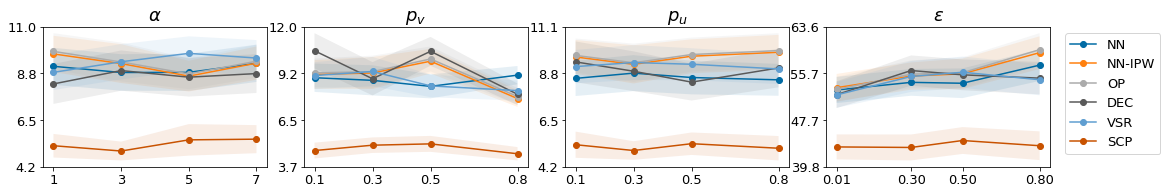

In [7]:
plt.figure(figsize=(16,2.5))
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '13'

plt.subplot(141)
make_plot(settings[0], no_y=True)

plt.subplot(142)
make_plot(settings[5], no_y=True)

plt.subplot(143)
make_plot(settings[6], no_y=True)

plt.subplot(144)
make_plot(settings[7], no_y=True)


plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout(pad=0)

plt.savefig(fname='Fig_app_12_linear.png', dpi=300)

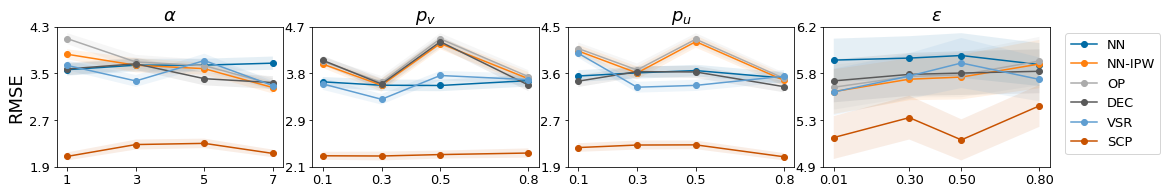

In [8]:
plt.figure(figsize=(16,2.5))
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '13'

plt.subplot(141)
make_plot(settings[0], linear=False)

plt.subplot(142)
make_plot(settings[5], no_y=True, linear=False)

plt.subplot(143)
make_plot(settings[6], no_y=True, linear=False)

plt.subplot(144)
make_plot(settings[7], no_y=True, linear=False)

ax = plt.gca()

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout(pad=0)

plt.savefig(fname='Fig_app_12_nonlinear.png', dpi=300)

# Figure 10

In [9]:
def make_plot(setting, no_y=False, linear=True):
    df = dat[dat[1].str.contains(setting)].copy()

    tmp = list(df[1].str.split('_'))
    level = [float(x[-2]) for x in tmp]
    lineara = [(x[-1]) for x in tmp]
    df['level'] = level
    df['linear'] = lineara
    if linear:
        df_linear = df[df.linear == 'linear'].copy()
    else:
        df_linear = df[df.linear == 'nonlinear'].copy()
    
    rename_dict = {
        'dor': 'NN', 'tarnet': 'CFR', 'cfrnet': 'CFR', 'propensity': 'NN-IPW', 'vsr': 'VSR', 'scp': 'SCP', 'drcrn': 'DR-CFR', 'bmc':'DEC', 'overlap': 'OP'
    }
    for method in ['dor', 'tarnet', 'drcrn']:
        df_method = df_linear[df_linear[0] == method].copy()
        
        plt.fill_between(df_method['level'], df_method[4] - 4 * df_method[5], df_method[4] + 4 * df_method[5], alpha=0.1)
        plt.plot(df_method['level'], df_method[4], '-o', label=rename_dict[method])
    
    ax = plt.gca()
    ax.set_xticks(np.unique(df_method['level']))

    plt.title('Linear' if linear else 'Nonlinear')
    plt.xlabel(setting_dict[setting], fontsize=18)
    ax.yaxis.set_minor_formatter(plt.NullFormatter())
    
    ymin, ymax = ax.get_ylim()
    custom_ticks = np.linspace(ymin, ymax, 4)
    ax.set_yticks(custom_ticks)
    ax.set_yticklabels(np.round(custom_ticks, 1))

    if no_y:
        pass
    else:
        plt.ylabel('RMSE', fontsize=18)


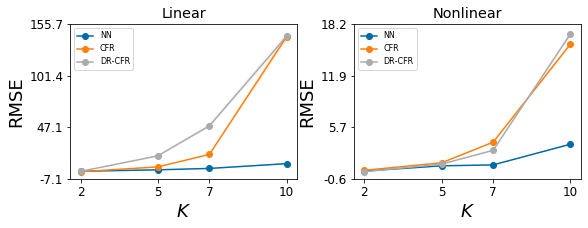

In [10]:
plt.figure(figsize=(8,3))
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '12'

plt.subplot(121)
make_plot(settings[3])
plt.legend(fontsize=8)


plt.subplot(122)
make_plot(settings[3], linear=False)
plt.legend(fontsize=8)


plt.tight_layout(pad=0.1)

plt.savefig(fname='Fig10.png', dpi=300)

# Figure 11

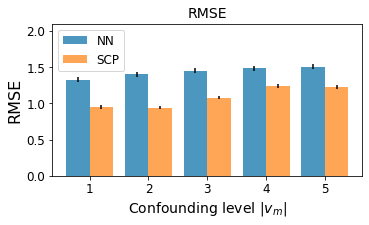

In [14]:
df = pds.read_csv('results/results_ea_confound.txt', sep=' ', header=None)
df.head()

df = df.groupby([0, 1]).agg('mean').reset_index()

df_scp = df[df[0] == 'SCP']
df_dor = df[df[0] == 'DOR']

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(5,3))
width = 0.4
plt.bar(np.arange(1,6)-0.2, df_dor[4],yerr=df_dor[5], color=colors[0], width=width, alpha=0.7, label='NN')
plt.bar(np.arange(1,6)+0.2, df_scp[4],yerr=df_scp[5], color=colors[1], width=width, alpha=0.7, label = 'SCP')
plt.xlabel(r'Confounding level $|v_m|$', fontsize=14)    
plt.ylabel('RMSE', fontsize=16)
plt.ylim(0, 2.1)
plt.legend(loc='upper left')
plt.title(r'RMSE', fontsize=14)    
plt.tight_layout(pad=0.2)
plt.savefig(fname='Fig11.png', dpi=300)